In [35]:
# %pip install nltk
# %pip install vaderSentiment
# %pip install matplotlib seaborn



In [3]:
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk

In [4]:
# Download NLTK resources
nltk.download('stopwords')
# Initialize stemmer and stop words
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /home/dhurba/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
data = pd.read_csv('../data/scrap.csv')

In [6]:
# Preprocessing function to clean the text
def preprocess_text(text):
    text = text.encode('ascii', 'ignore').decode('ascii') #Remove emoji
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    words = text.split()  # Split into words
    words = [word for word in words if word not in stop_words]  # Remove stop words
    words = [stemmer.stem(word) for word in words]  # Stemming
    return ' '.join(words)


def preprocess_text_label(text):
    text = text.encode('ascii', 'ignore').decode('ascii') #Remove emoji
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    return text

In [8]:
columns_to_remove = ['url', 'twitterUrl','retweetCount','replyCount','likeCount','quoteCount','createdAt','bookmarkCount','isRetweet','isQuote']
data_modified = data.drop(columns_to_remove, axis=1)
duplicates_text = data_modified.duplicated(subset=['text'])

# Print the rows where duplicates are True
print(data_modified[duplicates_text])

# Optionally, count the number of duplicates based on 'text' column
num_duplicates_text = data_modified[duplicates_text].shape[0]
print(f"Number of duplicates based on 'text': {num_duplicates_text}")
data_modified = data_modified.drop_duplicates(subset=['text'], keep='last')

print(data_modified)


                       id                                               text
20    1807112470659514445  @BhismaK62 Sir I find it hard to understand yo...
40    1807085669166264443  Khabarhub brings you a glimpse of major develo...
43    1806723539741094060  Khabarhub brings you a glimpse of major develo...
56    1806361531678089603  Khabarhub brings you a glimpse of major develo...
115   1806596861257543905  @SuryaRAcharya I agree with you in the context...
...                   ...                                                ...
9203  1126476090464247814  #Nepali corrupt politics continues &amp; peopl...
9207  1126113454564290561  #Nepali corrupt politics continues &amp; peopl...
9232  1134085906921611264  #Nepali corrupt politics continues &amp; peopl...
9236  1133723429595680769  #Nepali corrupt politics continues &amp; peopl...
9245  1133361071262261248  #Nepali corrupt politics continues &amp; peopl...

[364 rows x 2 columns]
Number of duplicates based on 'text': 364
          

In [9]:
duplicates_text = data_modified.duplicated(subset=['text'])

# Print the rows where duplicates are True
print(data_modified[duplicates_text])

# Optionally, count the number of duplicates based on 'text' column
num_duplicates_text = data_modified[duplicates_text].shape[0]
print(f"Number of duplicates based on 'text': {num_duplicates_text}")
# df_unique_subset_last = df_unique_subset_last.drop_duplicates(subset=['text'], keep='last')

Empty DataFrame
Columns: [id, text]
Index: []
Number of duplicates based on 'text': 0


In [10]:
data_modified['cleaned_text_without_stop_words'] = data_modified['text'].apply(preprocess_text_label)
print(data_modified)
data_modified['cleaned_text_with_stop_words_removal'] = data_modified['text'].apply(preprocess_text)

                       id                                               text  \
1     1807053896587919743  We should consider dismantling provincial stru...   
2     1807031275989114981  Those joining in insurance online will be requ...   
3     1807030978554269711  Minister Aryal also requested the provincial a...   
4     1807029744837300466  \xf0\x9f\x8c\xbe Happy National Paddy Day (Aas...   
5     1806998724926755034  Climate action plans and targets set by the Ne...   
...                   ...                                                ...   
9305  1133928714687864832  The #government has earmarked Rs 141 billion i...   
9306  1133924827641724928  The government announced a #budget of Rs 7.39 ...   
9307  1133923287422029824  EXCEPT OF FEW POLITICAL COMPROMISES, THIS BUDJ...   
9308  1133913423576616960  There has not been any #announcement of new ma...   
9309  1133905866795565056  Easy access to permits through Nepal's governm...   

                        cleaned_text_wi

In [11]:
duplicates_text = data_modified.duplicated(subset=['cleaned_text_with_stop_words_removal'])

# Print the rows where duplicates are True
print(data_modified[duplicates_text])

# Optionally, count the number of duplicates based on 'text' column
num_duplicates_text = data_modified[duplicates_text].shape[0]
print(f"Number of duplicates based on 'text': {num_duplicates_text}")
data_modified = data_modified.drop_duplicates(subset=['cleaned_text_with_stop_words_removal'], keep='last')

                       id                                               text  \
37    1806377428475916743  Rajesh Yadav of Hindu Samrat Sena plans to sub...   
43    1806723539741094060  Khabarhub brings you a glimpse of major develo...   
56    1806361531678089603  Khabarhub brings you a glimpse of major develo...   
78    1806377423895752845  Tensions flare in #Rautahat, #Nepal as a minor...   
112   1806606316397326411  @anilkathmandu @kathmandupost Yes! With regard...   
...                   ...                                                ...   
9199  1126672914659532801  #Nepal's Prime Minister begins official visit ...   
9204  1126229075104870400  Join us on May 14th for a talk on the politics...   
9216  1132545196216840193  Amid journalists’ protest against the Media Co...   
9217  1132485256689463301  Amid journalists’ protest against the Media Co...   
9290  1133985972255961088  Prime Minister of Nepal, K P Sharma Oli is arr...   

                        cleaned_text_wi

In [44]:
duplicates_text = data_modified.duplicated(subset=['cleaned_text_with_stop_words_removal'])

# Print the rows where duplicates are True
print(data_modified[duplicates_text])

# Optionally, count the number of duplicates based on 'text' column
num_duplicates_text = data_modified[duplicates_text].shape[0]
print(f"Number of duplicates based on 'text': {num_duplicates_text}")

Empty DataFrame
Columns: [id, text, cleaned_text_without_stop_words, cleaned_text_with_stop_words_removal]
Index: []
Number of duplicates based on 'text': 0


In [45]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def vader_sentiment(text):
    scores = analyzer.polarity_scores(text)       #0.05 is a standard threshold for vadar
    if scores['compound'] > 0.05:
        return 'positive'
    elif scores['compound'] < -0.05:
        return 'negative'
    else:
        return 'neutral'
    
# Apply the vader_sentiment function to your dataset
data_modified['label'] = data_modified['cleaned_text_without_stop_words'].apply(vader_sentiment)


In [46]:
columns_to_remove = ['cleaned_text_without_stop_words']
data_modified = data_modified.drop(columns_to_remove, axis=1)
data_modified.to_csv("../data/labeled.csv", index=False,encoding='utf-8')
print(data_modified)

                       id                                               text  \
1     1807053896587919743  We should consider dismantling provincial stru...   
2     1807031275989114981  Those joining in insurance online will be requ...   
3     1807030978554269711  Minister Aryal also requested the provincial a...   
4     1807029744837300466  \xf0\x9f\x8c\xbe Happy National Paddy Day (Aas...   
5     1806998724926755034  Climate action plans and targets set by the Ne...   
...                   ...                                                ...   
9305  1133928714687864832  The #government has earmarked Rs 141 billion i...   
9306  1133924827641724928  The government announced a #budget of Rs 7.39 ...   
9307  1133923287422029824  EXCEPT OF FEW POLITICAL COMPROMISES, THIS BUDJ...   
9308  1133913423576616960  There has not been any #announcement of new ma...   
9309  1133905866795565056  Easy access to permits through Nepal's governm...   

                   cleaned_text_with_st

In [47]:
countpositive = 0
countnegative=0
countneutral=0
for data in data_modified['label']:
    # print(data)
    if data == 'positive':
        countpositive = countpositive +1
    elif data == 'negative':
        countnegative = countnegative +1
    else:
        countneutral = countneutral +1


print(countpositive,countnegative,countneutral)

3557 3264 1620


In [48]:
# print(3793+3480+1673)
# print(3557+3264+1620)


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
labeled_df = pd.read_csv('../data/labeled.csv')

# Compute class distribution
class_distribution = labeled_df['label'].value_counts().sort_index()

# Create a DataFrame for plotting
class_dist_df = pd.DataFrame({
    'Class': class_distribution.index,
    'Count': class_distribution.values
})

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Class', y='Count', data=class_dist_df)

plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x labels for better readability if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('../reports/class_distribution.png', format='png', dpi=300,transparent=True)
# plt.show()
plt.close()


In [50]:
data

'positive'

AttributeError: 'str' object has no attribute 'values'

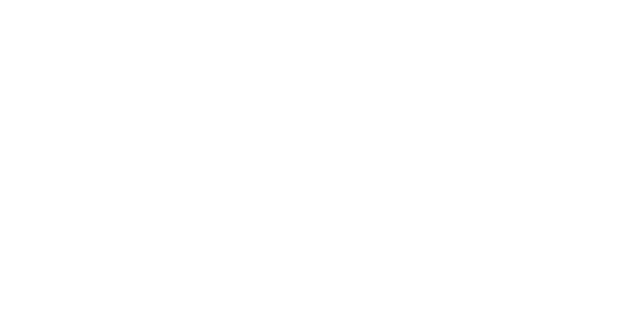

In [51]:
fig, ax = plt.subplots(figsize=(8, 4))  # Adjust size as needed

# Hide axes
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False)
ax.set_frame_on(False)
# df = pd.DataFrame(data)
# Create the table
tbl = plt.table(cellText=data.values,
                colLabels=data.columns,
                cellLoc='center',
                loc='center',
                bbox=[0, 0, 1, 1])

# Save as image
plt.savefig('../reports/tweets_sentiment.png', bbox_inches='tight', pad_inches=0.1)